# 作业说明

请填写代码以完成作业，并将整个包以 zip 文件的形式提交到网络学堂

# 第一步

运行以下代码以导入你需要的模块，如需要你也可以修改此代码（例如，导入更多模块）

In [4]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage  # For image filtering
import imageio  # For loading images
import numpy as np
from numpy import array, zeros, arange, exp, random, ones_like, zeros_like, ones
from scipy.fftpack import dct
from scipy.fftpack import idct
from scipy.signal import convolve, convolve2d, correlate2d, correlate
from imageio import imread
import itertools, math
import matplotlib.pyplot as plt
import unittest
from PIL import Image


# 问题1：滤波器

滤波器是一种从信号中去除一些不需要的成分或特征的设备或过程

了解滤波的生成与应用可以帮助我们解决很多实际问题，例如图像去噪

## 1.1 均值滤波器

均值滤波器用局部平均代替像素，具有平滑（模糊）的效果

在这个问题中，我们将实现一个简单的均值滤波器

你可以参考下图来回忆计算过程

<img src="box_filter.png" align='middle' width="50%"> 

In [5]:
def box_kernel(size):
    K = np.ones((size, size))
    ####################
    # your code
    K = K / (size * size)
    ####################
    return K


In [6]:
box_kernel_impl = box_kernel(3)
print(box_kernel_impl)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


## 1.2 高斯滤波器

高斯滤波器的核值是从二维高斯函数中采样的。 权重随着与中心像素的距离而下降
  
(a) 请完成函数 gaussian_kernel() 生成内核
  
(b) 请完成函数 gaussian_filter() 得到高斯模糊图像

你可以参考下图来回忆计算过程

<img src="gaussian_filter.png" align='middle'>

In [18]:
def gaussian_kernel(size, sigma):
    K = np.zeros((size, size))
    pad = size // 2

    for x in range(-pad, -pad + size):
        for y in range(-pad, -pad + size):
            ####################
            # your code
            # gaussian distribution
            K[x + size // 2][y + size // 2] = np.exp(
                -(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
            ####################

    # normalization
    K /= K.sum()
    return K


In [19]:
gaussian_kernel_impl = gaussian_kernel(size=3, sigma=2)
print(gaussian_kernel_impl)

[[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]


# 问题2：图像去噪

生成完滤波器，我们希望使用其解决图像去噪的问题

在这个问题中，我们将不同滤波器作用于不同的噪声图像上，观察处理的结果

提示：为了进行卷积，我们经常使用零填充，即在原始图像周围添加零。 以 [L,W,C] 图像为例。 如果内核大小为 3，我们将在图像周围添加一列和一行零，因此填充后的图像大小为 [L+2, W+2, C]

# 2.1 图像1

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

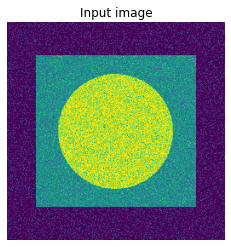

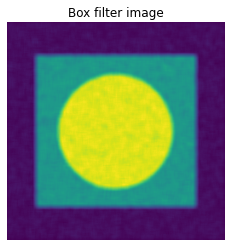

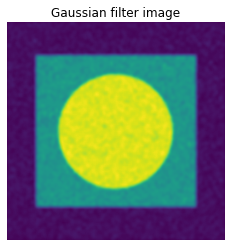

In [35]:
%matplotlib inline
im = imageio.imread('noise_img1.png')
print(im.shape)

def img_filter(image, r, K):
    # r: kernel_size K: kernel
    L, W = image.shape  # L: length; W: width

    # im_pad: generated for zero-padding
    im_pad = np.zeros((L + r - 1, W + r - 1))
    im_pad[r // 2 : L + r // 2, r // 2 : W + r // 2] = image
    im_output = np.zeros((L, W))

    for i in range(r // 2, L + r // 2):  # length position
        for j in range(r // 2, W + r // 2):  # width position
            ####################
            # your code
            im_output[i - r // 2][j - r // 2] = np.sum(im_pad[i - r // 2: i + r // 2 + 1, j - r // 2: j + r // 2 + 1] * K)
            ####################

    return im_output


plt.figure()
plt.imshow(im)
plt.title('Input image')
plt.axis('off')

kernel_size = 7
K_box = box_kernel(size = kernel_size)
K_guassian = gaussian_kernel(size = kernel_size, sigma = 2)

im_box = img_filter(im, r = kernel_size, K = K_box)
im_gaussian = img_filter(im, r = kernel_size, K = K_guassian)

plt.figure()
plt.imshow(im_box / 255)
plt.title('Box filter image')
plt.axis('off')

plt.figure()
plt.imshow(im_gaussian / 255)
plt.title('Gaussian filter image')
plt.axis('off')


# 2.2 图像2

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

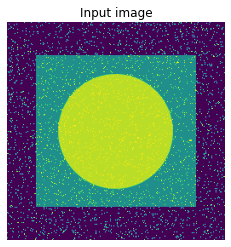

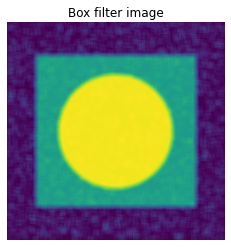

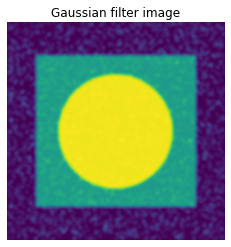

In [32]:
im = imageio.imread('noise_img2.png')
print(im.shape)


def img_filter(image, r, K):
    # r: kernel_size K: kernel
    L, W = image.shape  # L: length; W: width

    # im_pad: generated for zero-padding
    im_pad = np.zeros((L + r - 1, W + r - 1))
    im_pad[r // 2:L + r // 2, r // 2:W + r // 2] = image
    im_output = np.zeros((L, W))

    for i in range(r // 2, L + r // 2):  # length position
        for j in range(r // 2, W + r // 2):  # width position
            ####################
            # your code
            im_output[i - r // 2][j - r // 2] = np.sum(
                im_pad[i - r // 2:i + r // 2 + 1, j - r // 2:j + r // 2 + 1] *
                K)
            ####################

    return im_output


plt.figure()
plt.imshow(im)
plt.title('Input image')
plt.axis('off')

kernel_size = 7
K_box = box_kernel(size=kernel_size)
K_guassian = gaussian_kernel(size=kernel_size, sigma=2)

im_box = img_filter(im, r=kernel_size, K=K_box)
im_gaussian = img_filter(im, r=kernel_size, K=K_guassian)

plt.figure()
plt.imshow(im_box / 255)
plt.title('Box filter image')
plt.axis('off')

plt.figure()
plt.imshow(im_gaussian / 255)
plt.title('Gaussian filter image')
plt.axis('off')


# 2.3 问题思考

比较两张图片的去噪结果

试分析造成两张图片去噪效果不同的原因

####################

你的分析

比较效果：总体来说，均值滤波和高斯滤波都能在一定程度上滤除噪声；在边界处，使用高斯滤波的效果更加清晰；两种滤波方法均不能较好地处理椒盐噪声。

原因分析：
* 对于均值滤波，假设核的大小为$n \times n$，图像含有的噪声满足$\eta(i, j) \sim \mathcal{N}(0, \sigma^2)$，则经过均值滤波之后方差变为$\frac{\sigma^2}{n^2}$，从而起到滤除噪声的效果。

* 对于高斯滤波，除了可以减小噪声方差之外，它还引入了一个先验知识——离本像素越近的像素，它们之间相似的概率越大，从而能够更加精确地重建图像。

* 椒盐噪声不服从高斯分布，如果采用平均的方法，将会使得椒盐噪声的影响扩散到其他像素中。

####################

# 2.4 问题解决————中值滤波

中值滤波可以有效解决上述问题

现在请实现图像的中值滤波并比较与2.2中结果的区别

(256, 256)


(-0.5, 255.5, 255.5, -0.5)

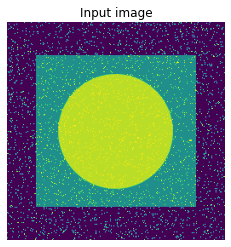

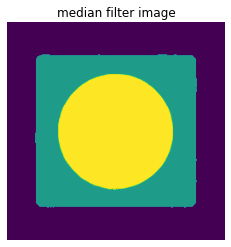

In [36]:
im = imageio.imread('noise_img2.png')
print(im.shape)


def img_median_filter(image, r):
    L, W = image.shape  # L: length; W: width; C: channel

    #im_pad: generated for zero-padding
    im_pad = np.zeros((L + r - 1, W + r - 1))
    im_pad[r // 2:L + r // 2, r // 2:W + r // 2] = image
    im_output = np.zeros((L, W))

    for i in range(r // 2, L + r // 2):  # length position
        for j in range(r // 2, W + r // 2):  # width position
            ####################
            # your code
            im_output[i - r // 2][j - r // 2] = np.median(
                im_pad[i - r // 2:i + r // 2 + 1, j - r // 2:j + r // 2 + 1]
            )
            ####################

    return im_output


plt.figure()
plt.imshow(im)
plt.title('Input image')
plt.axis('off')

im_meidan = img_median_filter(im, r=11)

plt.figure()
plt.imshow(im_meidan / 255)
plt.title('median filter image')
plt.axis('off')

明显可以看到，在中值滤波的作用下，椒盐噪声被滤除。